In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Y is latitude and X is longitude... 
# You can download the dataset from Kaggle: https://www.kaggle.com/c/sf-crime/data
# Please download only train.csv.zip file and unzip the file to the same directory with this Python source code..
df = pd.read_csv("train.csv")
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [16]:
# Dropping unnecessary columns PdDistrict, PdDistrict since we will use only Lat, Lng for Clustering..
# Also dropping Resolution, Descript,.. for we dont need them for clustering 

df = df.drop(['PdDistrict', 'Address', 'Resolution', 'Descript', 'DayOfWeek'], axis = 1) # axis = 1 for column drop, 0 for row drop..


In [17]:
df.tail(5)

,Dates,Category,X,Y
878044,2003-01-06 00:15:00,ROBBERY,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,-122.394926,37.738212


In [18]:
# We have no null data see:
df.isnull().sum()

Dates       0
Category    0
X           0
Y           0
dtype: int64

In [19]:
# For year filtering operation..

f = lambda x: (x["Dates"].split())[0] 
df["Dates"] = df.apply(f, axis=1)
df.head()

,Dates,Category,X,Y
0,2015-05-13,WARRANTS,-122.425892,37.774599
1,2015-05-13,OTHER OFFENSES,-122.425892,37.774599
2,2015-05-13,OTHER OFFENSES,-122.424363,37.800414
3,2015-05-13,LARCENY/THEFT,-122.426995,37.800873
4,2015-05-13,LARCENY/THEFT,-122.438738,37.771541


In [20]:
f = lambda x: (x["Dates"].split('-'))[0] 
df["Dates"] = df.apply(f, axis=1)
df.head()

,Dates,Category,X,Y
0,2015,WARRANTS,-122.425892,37.774599
1,2015,OTHER OFFENSES,-122.425892,37.774599
2,2015,OTHER OFFENSES,-122.424363,37.800414
3,2015,LARCENY/THEFT,-122.426995,37.800873
4,2015,LARCENY/THEFT,-122.438738,37.771541


In [21]:
df.tail()

,Dates,Category,X,Y
878044,2003,ROBBERY,-122.459033,37.714056
878045,2003,LARCENY/THEFT,-122.447364,37.731948
878046,2003,LARCENY/THEFT,-122.403390,37.780266
878047,2003,VANDALISM,-122.390531,37.780607
878048,2003,FORGERY/COUNTERFEITING,-122.394926,37.738212


In [22]:
# Categorize dataset by year otherwise too long to process.. 
# We will use only year 2014 values for this project, but you can change this easily if you want..
df_2014 = df[(df.Dates == '2014')]
df_2014.head()


,Dates,Category,X,Y
27584,2014,LARCENY/THEFT,-122.435563,37.760801
27585,2014,LARCENY/THEFT,-122.433575,37.800037
27586,2014,VEHICLE THEFT,-122.412777,37.786834
27587,2014,ASSAULT,-122.421702,37.773641
27588,2014,ASSAULT,-122.421702,37.773641


In [23]:
df_2014.tail()

,Dates,Category,X,Y
102345,2014,OTHER OFFENSES,-122.387235,37.719401
102346,2014,WARRANTS,-122.387235,37.719401
102347,2014,FRAUD,-122.418382,37.783258
102348,2014,NON-CRIMINAL,-122.413652,37.728320
102349,2014,FRAUD,-122.408563,37.797007


In [24]:
# We scale the data for accurate results...
scaler = MinMaxScaler()

# Y is latitude and X is longitude... 
# Any location in Earth can be described using Latitude and Longitude geographics coordinate values.

scaler.fit(df_2014[['X']])
df_2014['X_scaled'] = scaler.transform(df_2014[['X']]) 

scaler.fit(df_2014[['Y']])
df_2014['Y_scaled'] = scaler.transform(df_2014[['Y']])

# Please notice we have stored scaled values in new columns (X_scaled and Y_scaled), since we will use original values 
# in geographic operations later..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
df_2014.head()

,Dates,Category,X,Y,X_scaled,Y_scaled
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098


In [26]:
k_range = range(1,15)

list_dist = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_2014[['X_scaled','Y_scaled']])
    list_dist.append(model.inertia_)

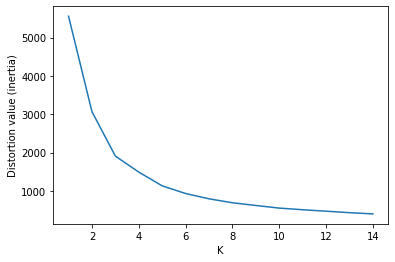

In [27]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [28]:
# Let's build a K-Means model for K = 5:
model = KMeans(n_clusters=5)
y_predicted = model.fit_predict(df_2014[['X_scaled','Y_scaled']])
y_predicted

array([3, 0, 0, ..., 0, 1, 0], dtype=int32)

In [29]:
df_2014['cluster'] = y_predicted
df_2014

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Dates,Category,X,Y,X_scaled,Y_scaled,cluster
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397,3
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894,0
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952,0
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,3
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,3
...,...,...,...,...,...,...,...
102345,2014,OTHER OFFENSES,-122.387235,37.719401,0.851793,0.101571,1
102346,2014,WARRANTS,-122.387235,37.719401,0.851793,0.101571,1
102347,2014,FRAUD,-122.418382,37.783258,0.641908,0.672007,0
102348,2014,NON-CRIMINAL,-122.413652,37.728320,0.673778,0.181249,1


In [30]:
# For Geographical Map Drawing we will use plotly library. 
# You can install plotly to your Anaconda Environment using the following command from Anaconda prompt:
# conda install plotly

import plotly.express as px   # You can install plotly module with: "conda install plotly" in Anaconda prompt.. 

In [31]:
# Don't forget Y is latiutude and X is longitude...
figure = px.scatter_mapbox(df_2014, lat='Y', lon='X',                       
                       center = dict(lat = 37.8, lon = -122.4), # This is the coordinate of San Francisco..
                       zoom = 9,                                # Zoom of the map
                       opacity = .9,                            # opacity of the map a value between 0 and 1..
                       mapbox_style = 'stamen-terrain',         # basemap 
                       color = 'cluster',                       # Map will draw scatter colors according to cluster number..
                       title = 'San Francisco Crime Districts',
                       width = 1100,
                       height = 700,                     
                       hover_data = ['cluster', 'Category', 'Y', 'X']
                       )

figure.show()

Output hidden; open in https://colab.research.google.com to view.